<div style="display: flex; align-items: center; gap: 20px;">

  <img src="logo.png" alt="ITESO, Universidad Jesuita de Guadalajara" style="width:120px; height:auto;">

  <h1>Estadística Descriptiva</h1>

</div>



<p><strong>Integrantes:</strong></p>
<ul>
  <li>Ximena Isaac</li>
  <li>Diego Lemus</li>
</ul>

<hr>

Trabajo para la materia de minería de datos


### Pregunta de investigación
**¿Cómo influyen la distancia, el tiempo de traslado y el modo de transporte en la elección de venir en automóvil particular al ITESO y en la saturación del estacionamiento en horas pico?**

### Contexto de los Datos
Los datos provienen de la **Encuesta de Movilidad ITESO 2025** que recopila
información de estudiantes, docentes y personal administrativo sobre:
- distancia recorrida
- tiempo de traslado
- modo de transporte
- días de asistencia
- y horarios de llegada/salida.

Estos datos permiten identificar factores asociados al uso del automóvil
y a la saturación del estacionamiento en horas pico.


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Configuración de las gráficas
plt.rcParams["figure.figsize"] = (8,4)
plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("../data/iteso_movilidad.csv", encoding="latin1")

print("Columnas disponibles:")
print(df.columns.tolist())
df.head()


Columnas disponibles:
['ID', 'Mi rol principal en la universidad es:', 'Distancia Recorrida (ida)', 'Tiempo de traslado (ida)', 'Modo de transporte principal', 'En tu viaje al ITESO: ¿Empleas el automóvil como la persona conductora o pasajera?', '¿Qué días de la semana te trasladas al ITESO?_1', '¿Qué días de la semana te trasladas al ITESO?_2', '¿Qué días de la semana te trasladas al ITESO?_3', '¿Qué días de la semana te trasladas al ITESO?_4', '¿Qué días de la semana te trasladas al ITESO?_5', '¿Qué días de la semana te trasladas al ITESO?_6', '¿Qué días de la semana te trasladas al ITESO?_7', 'dias_campus_total', 'Días de desplazamiento al trabajo', 'En un día típico, ¿a qué hora llegas y sales del ITESO?', 'Hora_1', 'Hora_2', 'Segundo Horario', 'Hora_1.1', 'Hora_2.1', 'Doy regularmente aventón_1', 'Pido regularmente aventón_1', 'Compartido con pasajeros_1']


,ID,Mi rol principal en la universidad es:,Distancia Recorrida (ida),Tiempo de traslado (ida),Modo de transporte principal,En tu viaje al ITESO: ¿Empleas el automóvil como la persona conductora o pasajera?,¿Qué días de la semana te trasladas al ITESO?_1,¿Qué días de la semana te trasladas al ITESO?_2,¿Qué días de la semana te trasladas al ITESO?_3,¿Qué días de la semana te trasladas al ITESO?_4,...,Días de desplazamiento al trabajo,"En un día típico, ¿a qué hora llegas y sales del ITESO?",Hora_1,Hora_2,Segundo Horario,Hora_1.1,Hora_2.1,Doy regularmente aventón_1,Pido regularmente aventón_1,Compartido con pasajeros_1
0,27486,Estudiante de licenciatura,9.69,NaN,Automóvil compacto,Pasajera,Lunes,NaN,Miércoles,Jueves,...,3,Mi horario de llegada es fijo,09:00:00,NaN,Mi horario de salida es flexible,05:00:00,08:30:00,NaN,NaN,1.0
1,27487,Profesor (a) de tiempo fijo,11.62,NaN,Automóvil SUV (tipo camioneta),Conductora,Lunes,Martes,Miércoles,Jueves,...,5,Mi horario de llegada es fijo,06:30:00,NaN,Mi horario de salida es fijo,15:00:00,NaN,1 vez por semana,Nunca,2.0
2,27488,Estudiante de licenciatura,24.07,NaN,Tren Ligero (Mi Tren),Pasajera,Lunes,Martes,Miércoles,Jueves,...,5,Mi horario de llegada es flexible,07:00:00,09:00:00,Mi horario de salida es flexible,11:00:00,03:00:00,NaN,Nunca,1.0
3,27489,Personal administrativo,11.78,NaN,Automóvil compacto,Conductora,Lunes,Martes,Miércoles,Jueves,...,5,Mi horario de llegada es fijo,08:00:00,NaN,Mi horario de salida es fijo,17:05:00,NaN,Nunca,Nunca,NaN
4,27490,Estudiante de licenciatura,5.31,NaN,Automóvil compacto,Conductora,Lunes,Martes,Miércoles,Jueves,...,6,Mi horario de llegada es flexible,11:30:00,15:30:00,Mi horario de salida es flexible,16:30:00,21:00:00,Nunca,Nunca,NaN


## Estadística Descriptiva
### Distribución de Frecuencias
Frecuencia del **modo de transporte principal**.


In [3]:
modo_col = 'Modo de transporte principal'
modo_freq = df[modo_col].value_counts(dropna=False) # Calculamos la frecuencia absoluta de cada categoría
                                                    # Hacemos series con pandas
                                                    # El índice son "automovil compacto, tren ligero, etc" 
                                                    # Los valores se cuentan para darnos el total

print("Frecuencia de modos de transporte:\n")
print(modo_freq)

# Duardado de la tabla obtenida del análisis anterior
modo_freq.to_csv("../output/tablas/frecuencia_modos.csv", header=['conteo'])


Frecuencia de modos de transporte:

Modo de transporte principal
Automóvil compacto                                     286
Automóvil SUV (tipo camioneta)                         116
Tren Ligero (Mi Tren)                                   42
Transporte colectivo (Camión/rutas de MiTransporte)     37
Mi Macro (Calzada o Periférico)                         29
Transporte universitario                                27
Llego caminando hasta el ITESO                          24
Automóvil híbrido                                       18
Bicicleta propia                                        11
Taxi (internet o aplicación como Uber)                   9
NaN                                                      7
Automóvil eléctrico                                      3
Motocicleta                                              3
Scooter o monopatín                                      3
ATE                                                      1
Bicicleta pública (MiBici)                        

### Medidas de tendencia central y dispersión
Se calculan **media, mediana, moda, varianza, desviación estándar y percentiles (25/50/75)** para **Distancia Recorrida (ida)** y **Tiempo de traslado (ida)**.
Para fines de este estudio en particular, únicamente consideramos los trayectos de ida ya que esto es lo que afecta el que un usuario pueda o no tomar un lugar de estacionamiento disponible o encontrarse en alguna congesión dentro del campus.


In [4]:
# Convertimos los valores a numéricos
dist   = pd.to_numeric(df['Distancia Recorrida (ida)'], errors='coerce').dropna()
tiempo = pd.to_numeric(df['Tiempo de traslado (ida)'],  errors='coerce').dropna()

# Distancia
dist_count = dist.count()
dist_mean  = dist.mean()
dist_median= dist.median()

# Obtención de moda:
dist_mode  = dist.mode()
dist_mode  = dist_mode.iloc[0] if not dist_mode.empty else np.nan
dist_var   = dist.var()
dist_std   = dist.std()
dist_p25   = np.percentile(dist, 25)
dist_p50   = np.percentile(dist, 50)
dist_p75   = np.percentile(dist, 75)

# Tiempos
tiempo_count = tiempo.count()
tiempo_mean  = tiempo.mean()
tiempo_median= tiempo.median()
tiempo_mode  = tiempo.mode()
tiempo_mode  = tiempo_mode.iloc[0] if not tiempo_mode.empty else np.nan
tiempo_var   = tiempo.var()
tiempo_std   = tiempo.std()
tiempo_p25   = np.percentile(tiempo, 25)
tiempo_p50   = np.percentile(tiempo, 50)
tiempo_p75   = np.percentile(tiempo, 75)

# Tabla con resultados
tabla_resumen = pd.DataFrame({
    "Distancia_km": [dist_count, dist_mean, dist_median, dist_mode,
                     dist_var, dist_std, dist_p25, dist_p50, dist_p75],
    "Tiempo_min":   [tiempo_count, tiempo_mean, tiempo_median, tiempo_mode,
                     tiempo_var, tiempo_std, tiempo_p25, tiempo_p50, tiempo_p75]
}, index=["count","mean","median","mode","var","std","p25","p50","p75"])

print(tabla_resumen.round(2))
tabla_resumen.to_csv("descriptivos_dist_tiempo.csv")


        Distancia_km  Tiempo_min
count         611.00       62.00
mean           12.89       51.77
median         11.63       15.00
mode            5.43        5.00
var            58.97     9747.16
std             7.68       98.73
p25             7.28        5.25
p50            11.63       15.00
p75            17.18       56.25


## Explicación de las métricas

- **Distribución de frecuencias:** Conteo de observaciones por categoría.
- **Media:** Promedio de los valores, sensible a valores extremos.
- **Mediana:** Valor central que divide la muestra en dos mitades.
- **Moda:** Valor que ocurre con mayor frecuencia.
- **Varianza:** Dispersión respecto a la media (unidades al cuadrado).
- **Desviación estándar:** Raíz cuadrada de la varianza; “desvío típico”.
- **Percentiles (25/50/75):** Valores que delimitan el 25%, 50% y 75% inferior de la distribución.


1. Histograma de **distancias**: Muestra cuántas personas recorren cada rango de kilómetros. Sirve para ver si la mayoría vive cerca o lejos del campus.

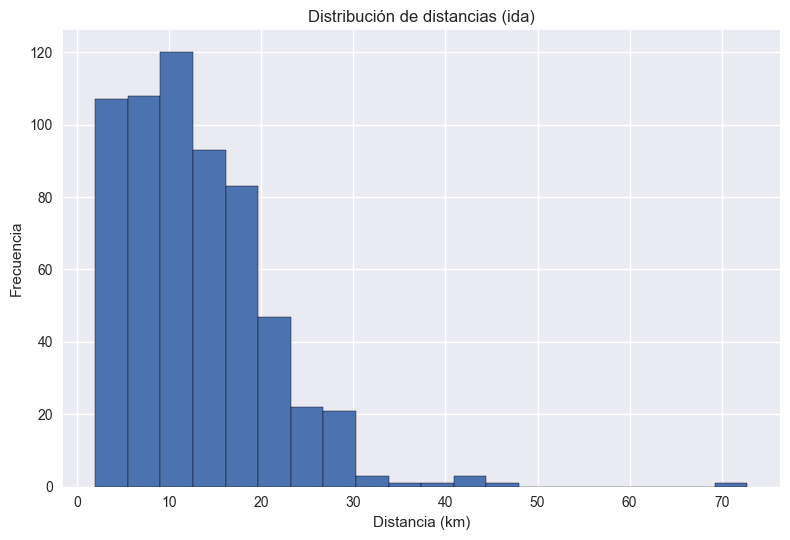

In [5]:
# Histograma de distancias
plt.figure()
plt.hist(dist, bins=20, edgecolor='black')
plt.xlabel('Distancia (km)')
plt.ylabel('Frecuencia')
plt.title('Distribución de distancias (ida)')
plt.tight_layout()
plt.savefig("../output/graficas/hist_distancias.png")
plt.show()



2. Histograma de **tiempos de traslado**: Indica cuántos viajes caen en cada rango de minutos. Permite detectar el tiempo típico y la presencia de trayectos muy largos.


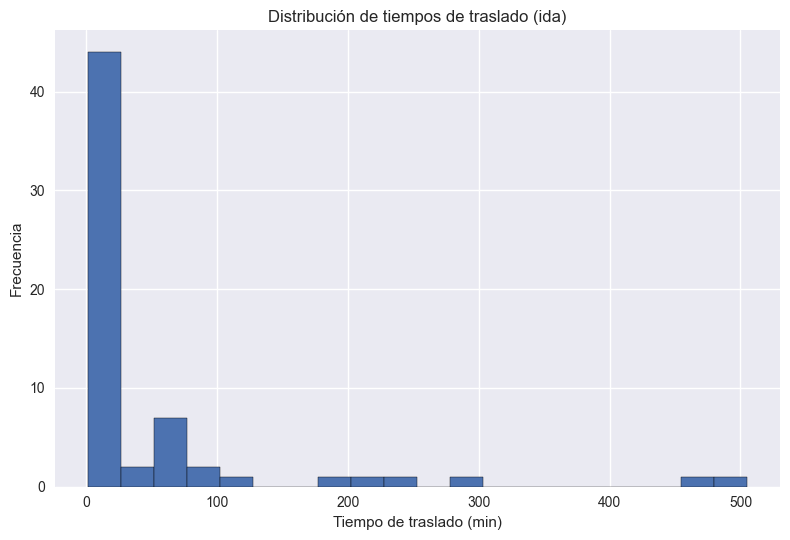

In [6]:

# Histograma de tiempos
plt.figure()
plt.hist(tiempo, bins=20, edgecolor='black')
plt.xlabel('Tiempo de traslado (min)')
plt.ylabel('Frecuencia')
plt.title('Distribución de tiempos de traslado (ida)')
plt.tight_layout()
plt.savefig("../output/graficas/hist_tiempo.png")
plt.show()

3. Dispersión **distancia vs tiempo**: Cada punto es una persona. Revela si a mayor distancia aumenta el tiempo o si hay casos donde el tiempo es alto aun con distancias cortas (tráfico, transbordos).

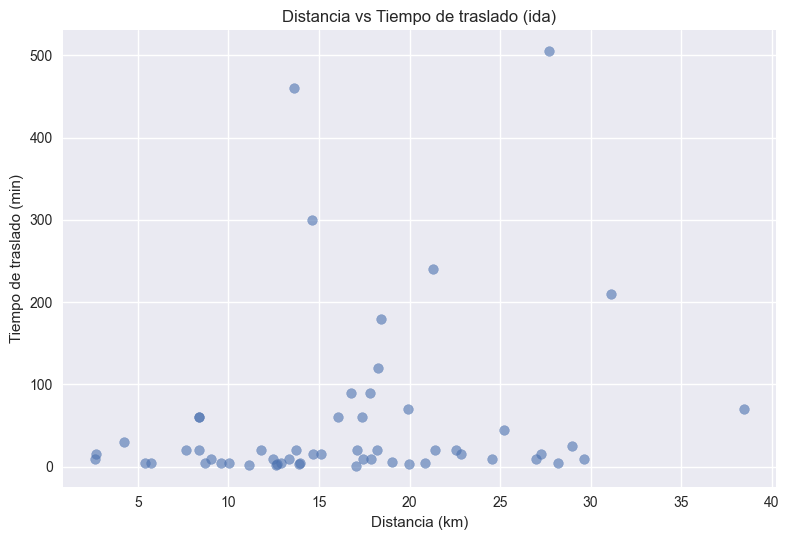

In [7]:
# Scatter Distancia vs Tiempo (pares válidos)
pair = pd.DataFrame({'dist': dist, 'tiempo': tiempo}).dropna()

plt.figure()
plt.scatter(pair['dist'], pair['tiempo'], alpha=0.6)
plt.xlabel('Distancia (km)')
plt.ylabel('Tiempo de traslado (min)')
plt.title('Distancia vs Tiempo de traslado (ida)')
plt.tight_layout()
plt.savefig("../output/graficas/scatter_distancia_tiempo.png")
plt.show()

## Conclusiones

### 1. Predomina el uso de automóvil particular
La gran mayoría de los encuestados utiliza **automóvil compacto o SUV** como medio principal de transporte (más del 60 % de las observaciones), muy por encima de opciones como transporte universitario, tren ligero o camión.  
Esto confirma que la saturación del estacionamiento en horas pico tiene una base clara en la **alta dependencia del vehículo privado**.

---

### 2. Distancias moderadas pero suficientes para no optar por caminata
- **Distancia media:** ~12.9 km  
- **Mediana:** ~11.6 km  
- **Moda:** ~5.4 km  

La mayoría de los traslados son de entre **5 a 20 km** (percentiles 25 y 75). Son distancias posibles en bicicleta pero largas para caminata, esto sugeriría al estudiante a optar por no utilizar automóvil particular.

---

### 3. Tiempos de traslado muy dispersos
- **Tiempo medio:** ~52 min  
- **Mediana:** 15 min  
- **Varianza:** Muy alta (~9747) con una desviación de ~99 min.  

Se muestran **casos irregulares** de traslados que superan las 2–5 horas, lo que supera la media establecida. La mediana (15 min) indica que la mayoría hace trayectos relativamente cortos, pero unos pocos viajes muy largos generan picos y problemas de planeación.

---

### 4. Relación distancia–tiempo débil
El diagrama de dispersión muestra que en la mayoría de los casos: **mayor distancia implica mayor tiempo**, aunque hay puntos con **tiempos desproporcionados** para distancias medias, posiblemente por tráfico intenso o transbordos. Con esto observamos que **la congestión vial pesa tanto como la distancia**.

---

### 5. Toma de decisiones basadas en resultados
- **Alta dependencia del auto:** reforzar transporte universitario y sistemas de ride con la aplicación AllRide.  
- **Distancias medias:** Implementar algo parecido a **MiBici** pero de ITESO (MiBici ITESO), quizás considerar la implementación de un puesto de carga y que se hága préstamo de **bicicletas eléctricas** e implementar más rutas de transporte ITESO.  
- **Diferencias de tiempo:** los picos de tráfico justificarían **escalonar horarios de entrada/salida** para aplanar la curva de demanda, esto se podría lograr observando las horas a las que se oferta una mayor cantidad de clases y distribuirlas en distintos horarios.

